In [2]:
#IMPORTING NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
df = pd.read_csv('city_hour.csv')
Polluted_df = pd.read_excel('Severly Polluted Days 2015-2020.xlsx')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['hour'] = df['Datetime'].dt.hour

In [4]:
delhi_df = df.loc[(df['City'] == 'Delhi')]

In [5]:
delhi_df.index = [ i for i in range (0, len(delhi_df)) ]
delhi_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,hour
0,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN,1
1,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN,2
2,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN,3
3,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN,4
4,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN,5


In [6]:
delhi_df.isnull().sum()


City              0
Datetime          0
PM2.5           375
PM10           2421
NO              298
NO2             330
NOx              25
NH3             980
CO              364
SO2            2852
O3             2201
Benzene          38
Toluene          26
Xylene        18904
AQI             498
AQI_Bucket      498
hour              0
dtype: int64

In [7]:
lst = delhi_df.columns
lst = lst[2:15]
mean_df = delhi_df.groupby('hour')[lst].mean()
mean_df['hour'] = mean_df.index
mean_df


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,hour
hour,,,,,,,,,,,,,,
0,139.336063,269.233554,62.589694,60.190642,78.552885,45.715661,2.366087,17.855897,46.529435,4.934041,24.249078,2.142559,260.024169,0
1,137.667246,258.589879,58.948806,55.601885,73.147270,45.752620,2.240647,16.226044,45.394120,4.646755,22.249900,2.214141,259.957661,1
2,135.736591,246.544288,53.535524,52.327217,67.054387,46.195855,2.193584,16.230562,44.614757,4.419920,20.616530,1.894758,259.618136,2
3,132.775191,234.288239,49.279779,48.317177,62.956456,44.162036,2.255402,15.632866,43.204093,4.079791,19.379756,1.822046,259.284995,3
4,130.450166,224.893021,45.914216,45.804170,60.731520,44.459537,2.052412,15.576347,41.833941,3.868818,18.268495,1.666097,259.361027,4
5,127.636804,219.244924,44.359339,44.419022,59.750812,43.204481,1.923563,14.802713,40.773325,3.693574,17.055092,1.505827,259.203526,5
6,125.581464,219.213961,47.008094,44.043061,60.907768,42.561508,1.945229,14.872793,38.974804,3.555980,16.146904,1.490531,258.927996,6
7,126.224777,229.086612,50.610035,45.033395,64.930244,43.221420,1.974184,15.044039,38.660481,3.616027,15.672755,1.540230,258.552314,7
8,131.340973,245.686369,53.280757,48.107337,68.133878,44.144840,1.987441,16.199926,40.785980,3.740419,15.246482,1.533864,258.169432,8


In [8]:
def fill_na(x,y):
    array = x
    array2 = y
    array3 = np.isnan(array)
    for i in range (0,len(array)-1):
      if (array3[i,0] == True ): 
         for j in range (0,len(array2)):
             if(array[i,1] == array2[j,1]):
                 array[i,0] = array2[j,0]
    return(array)

In [9]:
for i in range(2,15):
 ar =  fill_na(delhi_df.iloc[:,[i,16]].values , mean_df.iloc[:,[(i-2),13]].values)
 delhi_df.iloc[:,[i]] = ar[0:(len(ar)),0]

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
delhi_df.isnull().sum()

City            0
Datetime        0
PM2.5           0
PM10            0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene          0
AQI             0
AQI_Bucket    498
hour            0
dtype: int64

In [11]:
Polluted_df['Date'] = pd.to_datetime(Polluted_df['Date'])
Polluted_df['year'] = Polluted_df['Date'].dt.year
Polluted_df['month'] = Polluted_df['Date'].dt.month
Polluted_df['day'] = Polluted_df['Date'].dt.day

In [12]:

delhi_df['year'] = df['Datetime'].dt.year
delhi_df['month'] = df['Datetime'].dt.month
delhi_df['day'] = df['Datetime'].dt.day

<ipython-input-12-bc213032b5de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['year'] = df['Datetime'].dt.year
<ipython-input-12-bc213032b5de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['month'] = df['Datetime'].dt.month
<ipython-input-12-bc213032b5de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [13]:
array_1 = delhi_df.loc[:,['year','month','day']].values
array_2 = Polluted_df.loc[:,['year','month','day']].values
c= []

In [14]:
c= []
for i in range (0, len(array_1)):
    for j in range(0, len(array_2)):
        if (array_1[i,0] == array_2[j,0] and array_1[i ,1] == array_2[j,1] and array_1[i ,2] == array_2[j,2]):
            c.append(i)

In [15]:
Polluted_hr = delhi_df.iloc[c]

In [16]:
hist = (Polluted_hr.groupby(['year','hour'])['PM2.5','PM10','AQI'].mean())#['PM10'].mean())

hist2 = hist.reset_index()# very important
hist2


<ipython-input-16-919878dc39ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hist = (Polluted_hr.groupby(['year','hour'])['PM2.5','PM10','AQI'].mean())#['PM10'].mean())


,year,hour,PM2.5,PM10,AQI
0,2015,0,192.555857,366.272794,351.576923
1,2015,1,192.052881,356.170542,351.841299
2,2015,2,189.841402,341.595269,355.079881
3,2015,3,188.004046,329.169476,359.280246
4,2015,4,186.479291,315.930258,361.701426
...,...,...,...,...,...
139,2020,19,118.773200,221.234400,354.480000
140,2020,20,156.030000,279.218000,353.560000
141,2020,21,192.758000,323.265600,352.480000
142,2020,22,212.224000,339.368400,351.280000


Text(0.5, 1.0, 'Hourly variation in PM10')

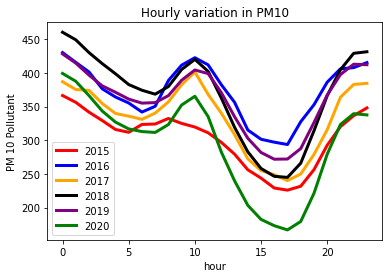

In [17]:
c= []
i= 0
while (i <24):
    c.append(i)
    i = i + 1
plot_2015 = hist2.loc[(hist2['year']== 2015)]
plot_2016 = hist2.loc[(hist2['year']== 2016)]
plot_2017 = hist2.loc[(hist2['year']== 2017)]
plot_2018 = hist2.loc[(hist2['year']== 2018)]
plot_2019 = hist2.loc[(hist2['year']== 2019)]
plot_2020 = hist2.loc[(hist2['year']== 2020)]

#plot_2015 = hist2.loc[(hist2['year']== 2021)]

plt.plot(plot_2015['hour'], plot_2015['PM10'], color ='red', label = '2015',linewidth = 3)
plt.plot(plot_2016['hour'], plot_2016['PM10'], color ='blue', label = '2016', linewidth = 3)
plt.plot(plot_2017['hour'], plot_2017['PM10'], color ='orange',label = '2017',linewidth = 3)
plt.plot(plot_2018['hour'], plot_2018['PM10'], color ='black',label = '2018',linewidth = 3)
plt.plot(plot_2019['hour'], plot_2019['PM10'], color ='purple',label = '2019',linewidth = 3)
plt.plot(plot_2020['hour'], plot_2020['PM10'], color ='green',label = '2020',linewidth = 3)
#plt.xticks(plot_2015['hour'].values)
plt.legend()
plt.xlabel("hour")
plt.ylabel("PM 10 Pollutant")
plt.title("Hourly variation in PM10")
#plt.xticks(c)

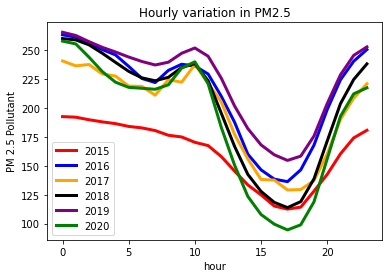

In [18]:
plt.plot(plot_2015['hour'], plot_2015['PM2.5'], color ='red', label = '2015',linewidth = 3)
plt.plot(plot_2016['hour'], plot_2016['PM2.5'], color ='blue', label = '2016', linewidth = 3)
plt.plot(plot_2017['hour'], plot_2017['PM2.5'], color ='orange',label = '2017',linewidth = 3)
plt.plot(plot_2018['hour'], plot_2018['PM2.5'], color ='black',label = '2018',linewidth = 3)
plt.plot(plot_2019['hour'], plot_2019['PM2.5'], color ='purple',label = '2019',linewidth = 3)
plt.plot(plot_2020['hour'], plot_2020['PM2.5'], color ='green',label = '2020',linewidth = 3)
plt.xlabel("hour")
plt.ylabel("PM 2.5 Pollutant")
plt.title("Hourly variation in PM2.5")
plt.legend()
#plt.xticks(c)